In [1]:
import numpy as np
np.random.seed(233)
import matplotlib.pyplot as plt

import cv2

%matplotlib inline

## Convert between different bits

Steps to change the image to $N$ bits image:

1. Normalize the color into $(0,1)$ range, (if already, skip)
2. Multiply the color with $2^{N}-1$, then add $0.5$
3. Round the color into integer
4. (optional for python visualization) Normalize the color into $(0,1)$ range

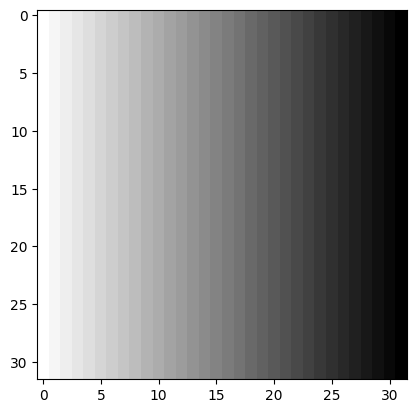

In [2]:
resolution = 32
x = np.linspace(0, 1, resolution)
y = np.linspace(0, 1, resolution)
X, Y = np.meshgrid(x, y, indexing='xy')
image_8bit = (1 - X) * 255
image_8bit = image_8bit.astype(np.int16)
plt.imshow(image_8bit, cmap='gray')

In [3]:
# Fisrt Step
# Normalize the data
normalize_img = image_8bit / 255

# Convert to 4 bit, second step
# multiply with 2^4-1 = 15
multiply_img = normalize_img * 15

# Third step
# round to integer
image_4bit = np.floor(multiply_img)

# Optional step
# normalize back
image_4bit = image_4bit / 15

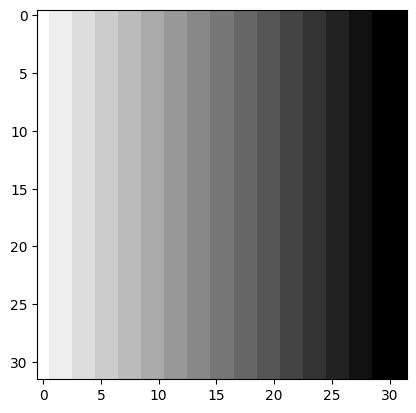

In [4]:
plt.imshow(image_4bit, cmap='gray')

In [5]:
def convert_to_N_bits(img, N):
    # Fisrt Step
    # Assume img is already normalized

    # Convert to 4 bit, second step
    # multiply with 2^4-1 = 15
    multiply_img = img * (2 ** N - 1) + 0.5

    # Third step
    # round to integer
    image_Nbit = np.floor(multiply_img)

    # Optional step
    # normalize back
    image_Nbit = image_Nbit / (2 ** N - 1)
    return image_Nbit

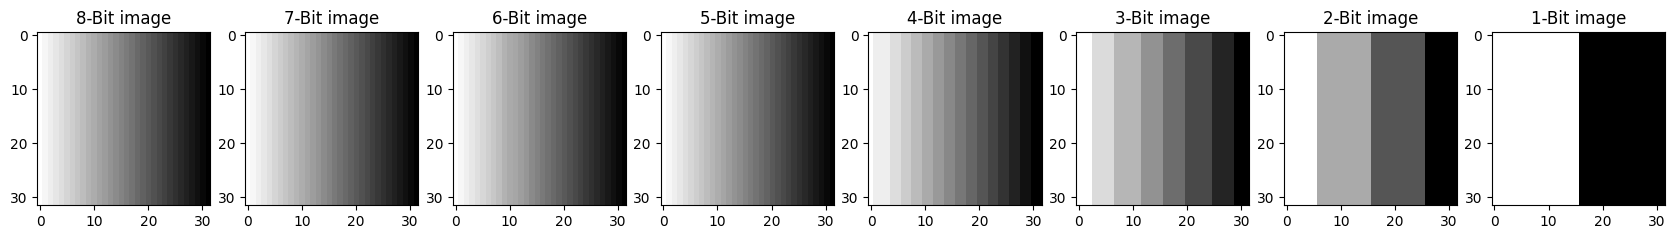

In [6]:
fig, axs = plt.subplots(1, 8, figsize=(21, 3))

axs[0].imshow(image_8bit, cmap='gray')
axs[0].set_title(f'8-Bit image')
for i, bit in enumerate(np.arange(7, 0, -1)):
    axs[i+1].imshow(convert_to_N_bits(image_8bit / 255, bit), 
                  cmap='gray', vmin=0, vmax=1)
    axs[i+1].set_title(f'{bit}-Bit image')

## Convert the color values into binary bit values

In [7]:
# binary_repr function
np.binary_repr(12, width=8)

'00001100'

In [8]:
# convert the following array into 8-bit bits values 
int_array = np.array([11, 111, 255])

In [9]:
# initialize a zero array with the same shape, 
# with one additional bit shape
bit_array = np.zeros(list(int_array.shape) + [8])
bit_array.shape

(3, 8)

In [10]:
# iterate through the whole array
for i in range(int_array.shape[0]):
    binary = np.binary_repr(int_array[i], width=8)
    for bit_i, bit in enumerate(binary):
        bit_array[i, bit_i] = int(bit)
bit_array

array([[0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

## Get the Bit plane

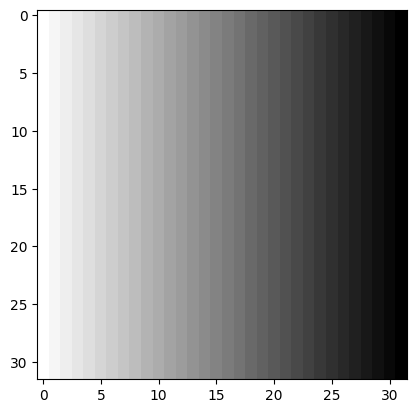

In [11]:
plt.imshow(image_8bit, cmap='gray')

In [12]:
image_8bit.shape

(32, 32)

In [13]:
# initialize a zero array with the same shape, 
# with one additional bit shape
bit_image = np.zeros(list(image_8bit.shape) + [8])
bit_image.shape

(32, 32, 8)

In [14]:
# iterate through the whole image
for row in range(image_8bit.shape[0]):
    for col in range(image_8bit.shape[1]):
        binary = np.binary_repr(image_8bit[row, col], width=8)
        for bit_i, bit in enumerate(binary):
            bit_image[row, col, bit_i] = int(bit)

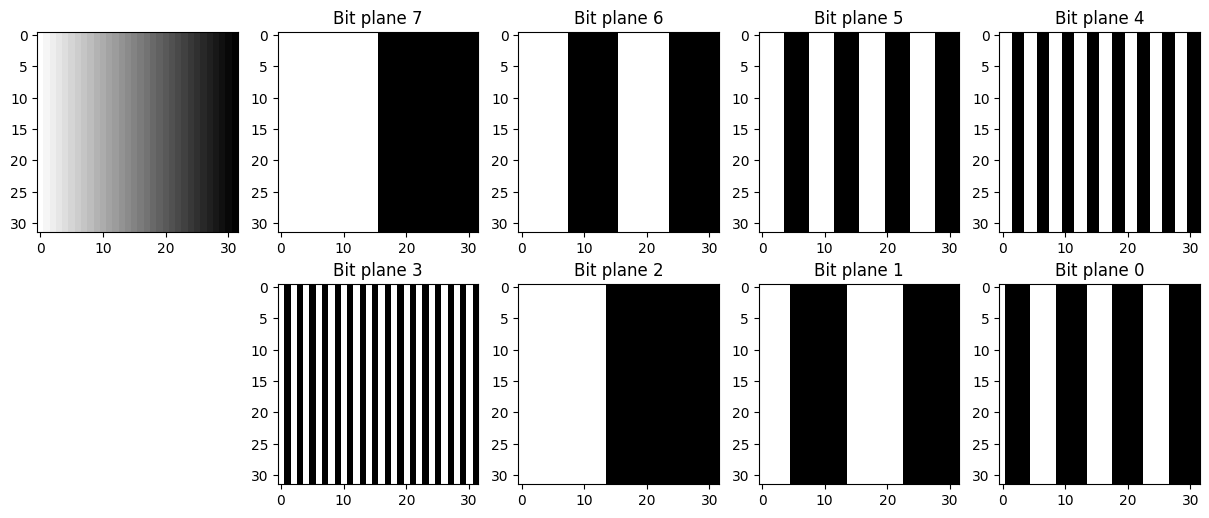

In [15]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs[0,0].imshow(image_8bit, cmap='gray')
axs[1,0].axis('off')

for bit in range(8):
    axs[bit // 4, 1 + bit % 4].imshow(bit_image[...,bit], cmap='gray')
    axs[bit // 4, 1 + bit % 4].set_title(f'Bit plane {7 - bit}')

## Image example

(<matplotlib.image.AxesImage at 0x76ce467e53a0>, (333, 500))

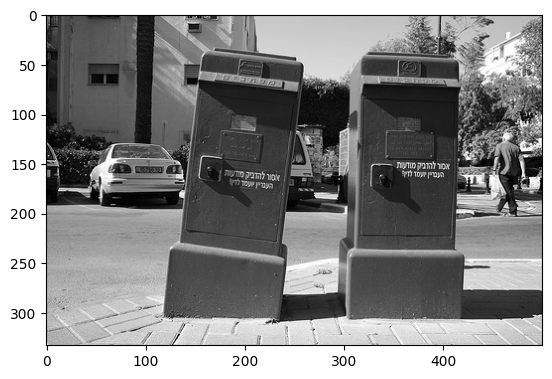

In [16]:
img = cv2.imread('example_image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray'), img.shape

In [17]:
# initialize a zero array with the same shape, 
# with one additional bit shape
bit_image = np.zeros(list(img.shape) + [8])
bit_image.shape

(333, 500, 8)

In [18]:
# iterate through the whole image
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        binary = np.binary_repr(img[row, col], width=8)
        for bit_i, bit in enumerate(binary):
            bit_image[row, col, bit_i] = int(bit)

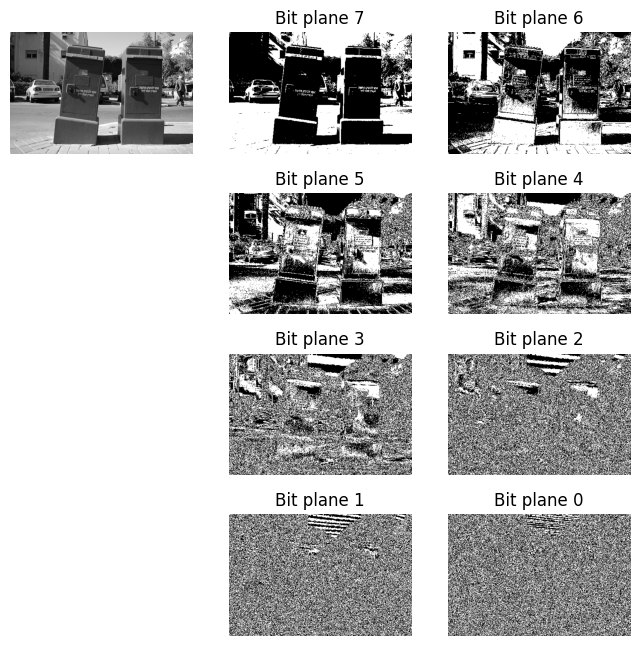

In [19]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8))
axs[0,0].imshow(img, cmap='gray')
axs[0,0].axis('off')
axs[1,0].axis('off')
axs[2,0].axis('off')
axs[3,0].axis('off')
axs[3,2].axis('off')

for bit in range(8):
    axs[bit // 2, 1 + bit % 2].imshow(bit_image[...,bit], cmap='gray')
    axs[bit // 2, 1 + bit % 2].set_title(f'Bit plane {7 - bit}')
    axs[bit // 2, 1 + bit % 2].axis('off')
